<h1>Final Analysis - HALF Mean QPS Parameters (Only MASS Subject #1)</h1>

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing libraries for statistical testing:
from scipy.stats import ttest_ind


<h2>Importing The Dataset + Preprocessing</h2>

In [3]:
# Absolute filepath for the spindle dataset (for MASS #1)
filepath = r"C:\Users\Jason Ha\Documents\University\4th Year\Thesis Project (Repo)\Jupyter Notebooks\Active Projects\mass_data\01-02-0001_PSG\spindles_1_half.csv"

# Load the dataset as a pandas dataframe into workspace
df = pd.read_csv(filepath)

# View the first 5 rows of the dataframe:
df.head(5)

,a,b,c,d,e,f,real_freq_hz,qps_energy,real_energy,residual_energy,qser,rser,qps_freq_hz,qrfr,min_residual,max_residual,rms_residual,raw_qps_corrcoeff,label
0,0.567894,4.565432,-1.852561,-23.541025,93.855167,-8.528151,14.336918,2203.706167,2442.885499,239.179335,0.902091,0.097909,14.937514,1.041892,-2.295433,2.239262,0.978119,0.949794,0
1,2.034658,-1.225479,-12.459977,-23.620477,88.650183,4.881263,14.336918,2821.895476,3340.112401,518.216919,0.844850,0.155150,14.109115,0.984111,-3.787089,3.773650,1.439746,0.919160,0
2,1.283468,-2.857974,-14.320651,7.828208,95.395734,11.375988,15.360983,733.318583,916.628121,183.309546,0.800018,0.199982,15.182703,0.988394,-2.014081,2.550215,0.856293,0.894461,0
3,1.354612,2.682389,-2.703859,-12.510970,75.229350,-2.615111,12.288786,2708.151709,2977.612056,269.460345,0.909505,0.090495,11.973123,0.974313,-2.453511,2.529398,1.038191,0.953707,0
4,1.488430,-7.023238,-24.564963,-14.054429,72.724773,-13.120028,12.288786,1733.202260,1864.917493,131.715235,0.929372,0.070628,11.574507,0.941876,-1.995830,1.865204,0.725852,0.964051,0


<h3>Analysis With ONLY QPS Parameters</h3>

In [4]:
# Pull out all columns ONLY associated with the QPS parameters.
qps_params = ['a', 'b', 'c', 'd', 'e', 'f', 'label']
other_params = ['qps_energy', 'residual_energy', 'qser', 'rser', 
                'qps_freq_hz', 'qrfr', 'min_residual', 'max_residual', 
                'rms_residual', 'raw_qps_corrcoeff', 'label']

# Create a fresh dataframe for ONLY QPS parameters:
df_qps = df[qps_params]

df_qps.head(5)

,a,b,c,d,e,f,label
0,0.567894,4.565432,-1.852561,-23.541025,93.855167,-8.528151,0
1,2.034658,-1.225479,-12.459977,-23.620477,88.650183,4.881263,0
2,1.283468,-2.857974,-14.320651,7.828208,95.395734,11.375988,0
3,1.354612,2.682389,-2.703859,-12.510970,75.229350,-2.615111,0
4,1.488430,-7.023238,-24.564963,-14.054429,72.724773,-13.120028,0


Generate a scatter plot to see the separation between the two classes with respect to the QPS parameters.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


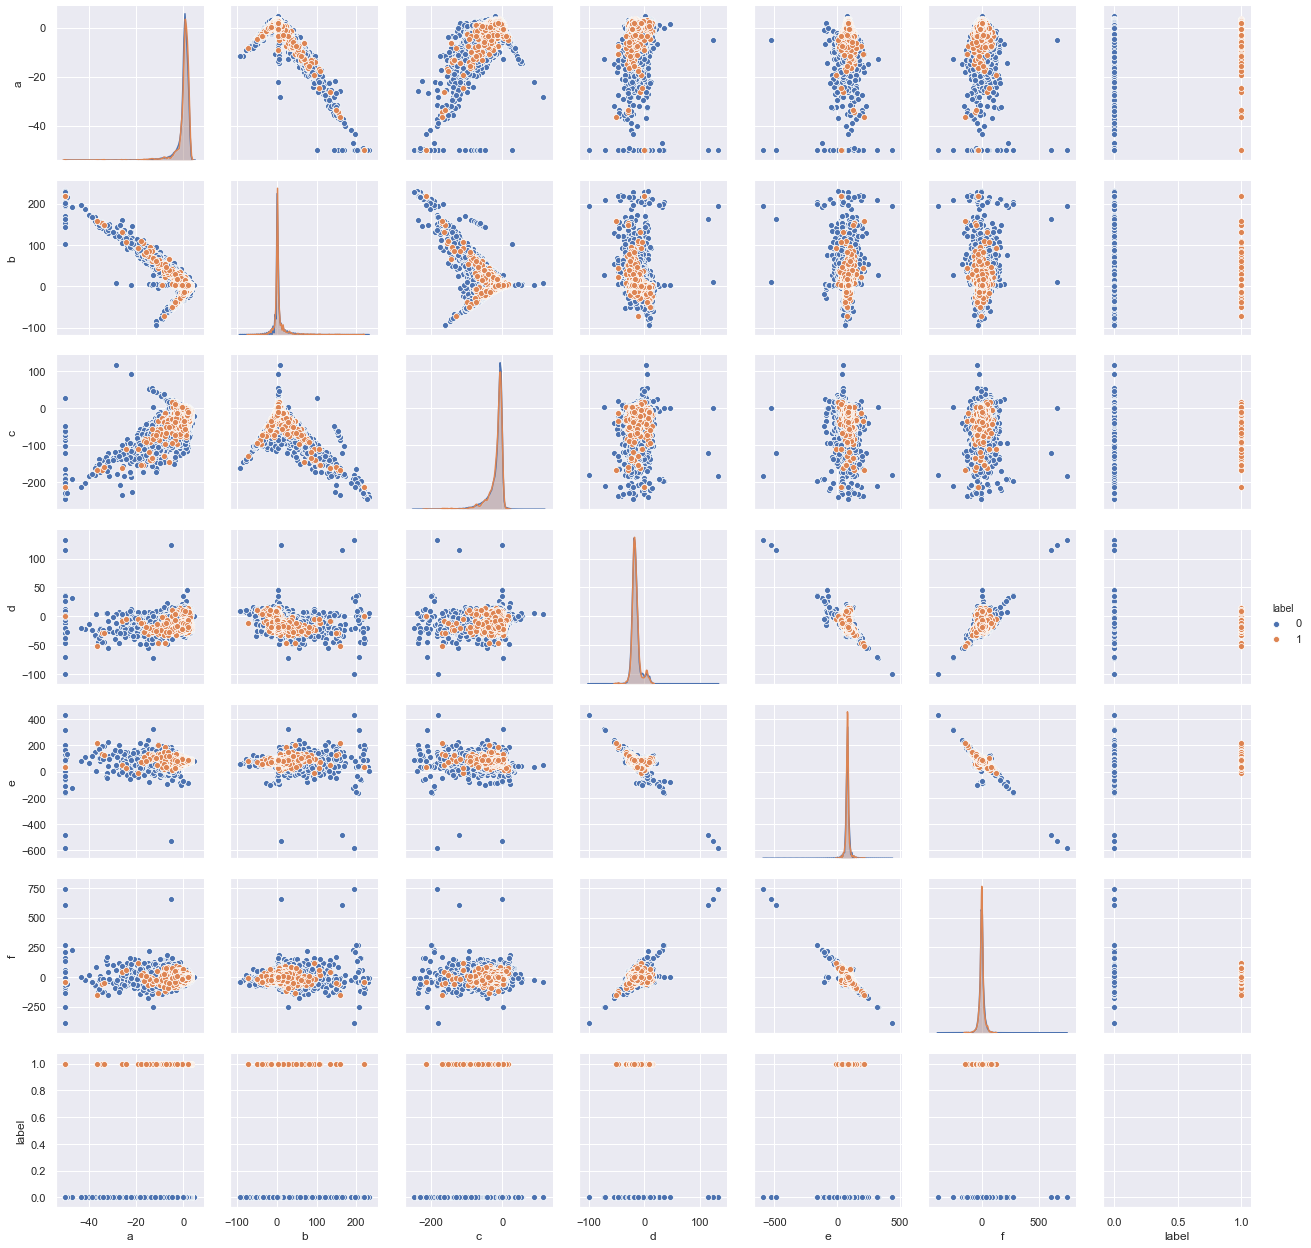

In [5]:
g = sns.pairplot(df[qps_params], hue='label')

In [6]:
# Statistics for spindles (label = 1)
df_qps[df_qps['label'] == 1].describe()

,a,b,c,d,e,f,label
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.0
mean,0.152583,5.087316,-16.361656,-15.534928,82.010376,-2.275794,1.0
std,3.677026,17.848481,22.808522,7.178471,14.918897,21.141923,0.0
min,-49.999998,-72.416173,-213.657643,-51.310597,-7.002582,-148.548843,1.0
25%,0.010466,0.160065,-19.710870,-19.599681,76.244319,-10.546683,1.0
50%,0.927215,1.726443,-8.465936,-16.684864,82.124819,-2.032031,1.0
75%,1.732412,4.509645,-4.118722,-13.254456,86.915172,5.914895,1.0
max,3.392805,218.063334,16.057886,14.455918,217.421368,119.893988,1.0


In [7]:
# Statistics for NON-spindles (label = 0)
df_qps[df_qps['label'] == 0].describe()

,a,b,c,d,e,f,label
count,27842.000000,27842.000000,27842.000000,27842.000000,27842.000000,27842.000000,27842.0
mean,0.028270,5.163801,-16.228302,-15.486506,81.563689,-1.267427,0.0
std,3.577511,16.971722,22.323731,7.489135,17.037877,22.633548,0.0
min,-50.000000,-92.992007,-246.444424,-100.035591,-586.864257,-385.800033,0.0
25%,-0.135810,0.314153,-20.466940,-19.697545,75.436025,-10.724114,0.0
50%,0.743326,1.944942,-8.512891,-16.805070,81.845478,-1.793374,0.0
75%,1.553530,4.911294,-3.626623,-13.292827,87.602964,7.108871,0.0
max,4.590745,230.873095,115.212552,132.222872,437.362667,740.871062,0.0


In [9]:
# Split dataset into spindle and non-spindles:
# Randomise the non-spindle set and truncate so equal in length to the spindle set:
spindles = df_qps[df_qps['label'] == 1]
non_spindles = df_qps[df_qps['label'] == 0].sample(frac=1).reset_index(drop = True)

# Truncate non-spindles:
non_spindles = non_spindles.iloc[0:len(spindles), :]

In [11]:
list_params = ['a', 'b', 'c', 'd', 'e', 'f']
p = {}

for param in list_params:
    (_, p[param]) = ttest_ind(spindles[param], non_spindles[param])

# Print out the p-values for each parameter:
for param in list_params:
    print("Parameter {}: p = {}".format(param, p[param]))

Parameter a: p = 0.8423985204588641
Parameter b: p = 0.09341186700898514
Parameter c: p = 0.26290016070703043
Parameter d: p = 0.784746369737258
Parameter e: p = 0.24859657838120366
Parameter f: p = 0.44447492832931434


<h2>Preliminary Classification Using Neural Networks</h2>

In [12]:
# Split dataset into spindle and non-spindles:
# Randomise the non-spindle set and truncate so equal in length to the spindle set:
spindles = df_qps[df_qps['label'] == 1]
non_spindles = df_qps[df_qps['label'] == 0].sample(frac=1).reset_index(drop = True)

# Truncate non-spindles:
non_spindles = non_spindles.iloc[0:len(spindles), :]

In [13]:
# Concatenate the spindle and non-spindle dataset then jumble once again before splitting into train and test set:
final_df = pd.concat([spindles, non_spindles], axis=0).reset_index(drop=True)

# Split into X and y (feature vectors and label vector):
X = final_df[['a', 'b', 'c', 'd', 'e', 'f']]
y = final_df['label']

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1552 samples, validate on 388 samples
Epoch 1/250
1552/1552 [==============================] - 1s 441us/step - loss: 0.7022 - acc: 0.4974 - val_loss: 0.6942 - val_acc: 0.5232
Epoch 2/250
1552/1552 [==============================] - 0s 68us/step - loss: 0.6940 - acc: 0.5097 - val_loss: 0.6925 - val_acc: 0.5284
Epoch 3/250
1552/1552 [==============================] - 0s 81us/step - loss: 0.6909 - acc: 0.5232 - val_loss: 0.6938 - val_acc: 0.5052
Epoch 4/250
1552/1552 [==============================] - 0s 71us/step - loss: 0.6886 - acc: 0.5290 - val_loss: 0.6962 - val_acc: 0.5077
Epoch 5/250
1552/1552 [==============================] - 0s 62us/step - loss: 0.6879 - acc: 0.5329 - val_loss: 0.6952 - val_acc: 0.5361
Epoch 6/250
1552/1552 [==============================] - 0s 64us/step - loss: 0.6891 - acc: 0.5290 - val_loss: 0.6954 - val_acc: 0.5309
Epoch 7/250
1552

1552/1552 [==============================] - 0s 69us/step - loss: 0.6620 - acc: 0.6063 - val_loss: 0.7139 - val_acc: 0.5180
Epoch 57/250
1552/1552 [==============================] - 0s 79us/step - loss: 0.6608 - acc: 0.6037 - val_loss: 0.7088 - val_acc: 0.4923
Epoch 58/250
1552/1552 [==============================] - 0s 73us/step - loss: 0.6598 - acc: 0.6031 - val_loss: 0.7101 - val_acc: 0.4923
Epoch 59/250
1552/1552 [==============================] - 0s 67us/step - loss: 0.6595 - acc: 0.6121 - val_loss: 0.7152 - val_acc: 0.5129
Epoch 60/250
1552/1552 [==============================] - 0s 70us/step - loss: 0.6582 - acc: 0.6121 - val_loss: 0.7139 - val_acc: 0.5026
Epoch 61/250
1552/1552 [==============================] - 0s 67us/step - loss: 0.6580 - acc: 0.6115 - val_loss: 0.7162 - val_acc: 0.5129
Epoch 62/250
1552/1552 [==============================] - 0s 67us/step - loss: 0.6572 - acc: 0.6211 - val_loss: 0.7170 - val_acc: 0.5103
Epoch 63/250
1552/1552 [==============================

Epoch 116/250
1552/1552 [==============================] - 0s 74us/step - loss: 0.6337 - acc: 0.6456 - val_loss: 0.7171 - val_acc: 0.5155
Epoch 117/250
1552/1552 [==============================] - 0s 66us/step - loss: 0.6320 - acc: 0.6372 - val_loss: 0.7192 - val_acc: 0.5180
Epoch 118/250
1552/1552 [==============================] - 0s 62us/step - loss: 0.6325 - acc: 0.6495 - val_loss: 0.7295 - val_acc: 0.5129
Epoch 119/250
1552/1552 [==============================] - 0s 62us/step - loss: 0.6306 - acc: 0.6463 - val_loss: 0.7287 - val_acc: 0.5026
Epoch 120/250
1552/1552 [==============================] - 0s 70us/step - loss: 0.6320 - acc: 0.6488 - val_loss: 0.7247 - val_acc: 0.5129
Epoch 121/250
1552/1552 [==============================] - 0s 72us/step - loss: 0.6316 - acc: 0.6430 - val_loss: 0.7290 - val_acc: 0.4897
Epoch 122/250
1552/1552 [==============================] - 0s 75us/step - loss: 0.6295 - acc: 0.6527 - val_loss: 0.7278 - val_acc: 0.5052
Epoch 123/250
1552/1552 [=========

1552/1552 [==============================] - 0s 73us/step - loss: 0.6083 - acc: 0.6701 - val_loss: 0.7391 - val_acc: 0.5309
Epoch 176/250
1552/1552 [==============================] - 0s 73us/step - loss: 0.6086 - acc: 0.6727 - val_loss: 0.7394 - val_acc: 0.5026
Epoch 177/250
1552/1552 [==============================] - 0s 64us/step - loss: 0.6088 - acc: 0.6688 - val_loss: 0.7473 - val_acc: 0.5052
Epoch 178/250
1552/1552 [==============================] - 0s 67us/step - loss: 0.6074 - acc: 0.6662 - val_loss: 0.7574 - val_acc: 0.5026
Epoch 179/250
1552/1552 [==============================] - 0s 75us/step - loss: 0.6087 - acc: 0.6662 - val_loss: 0.7417 - val_acc: 0.5387
Epoch 180/250
1552/1552 [==============================] - 0s 67us/step - loss: 0.6104 - acc: 0.6669 - val_loss: 0.7499 - val_acc: 0.4974
Epoch 181/250
1552/1552 [==============================] - 0s 64us/step - loss: 0.6068 - acc: 0.6656 - val_loss: 0.7388 - val_acc: 0.5335
Epoch 182/250
1552/1552 [=======================

1552/1552 [==============================] - 0s 57us/step - loss: 0.5872 - acc: 0.6881 - val_loss: 0.7605 - val_acc: 0.5309
Epoch 235/250
1552/1552 [==============================] - 0s 67us/step - loss: 0.5865 - acc: 0.6888 - val_loss: 0.7576 - val_acc: 0.5206
Epoch 236/250
1552/1552 [==============================] - 0s 74us/step - loss: 0.5890 - acc: 0.6952 - val_loss: 0.7638 - val_acc: 0.5206
Epoch 237/250
1552/1552 [==============================] - 0s 66us/step - loss: 0.5852 - acc: 0.6959 - val_loss: 0.7531 - val_acc: 0.5284
Epoch 238/250
1552/1552 [==============================] - 0s 68us/step - loss: 0.5852 - acc: 0.6901 - val_loss: 0.7608 - val_acc: 0.5077
Epoch 239/250
1552/1552 [==============================] - 0s 58us/step - loss: 0.5843 - acc: 0.6894 - val_loss: 0.7561 - val_acc: 0.5258
Epoch 240/250
1552/1552 [==============================] - 0s 62us/step - loss: 0.5878 - acc: 0.6965 - val_loss: 0.7649 - val_acc: 0.5206
Epoch 241/250
1552/1552 [=======================

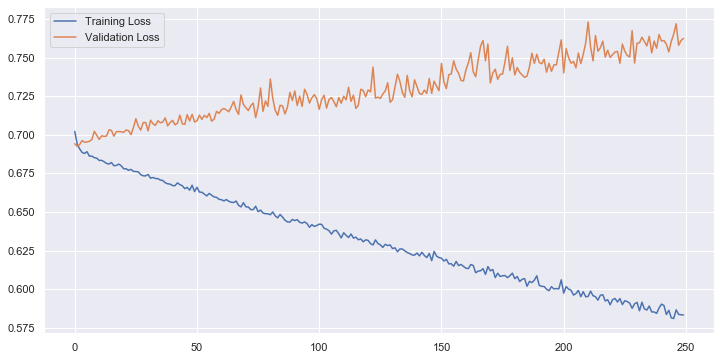

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the 'all_features' dataframe into training and test subsets. CV is performed using 'cross_val_score'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalise training set first and map mean and variance of standardised training set onto the test set.
std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

# Importing libraries for machine learning via Keras:
from keras.models import Sequential
from keras.layers import Dense, Activation

model_nn = Sequential()
model_nn.add(Dense(38, activation='relu', input_dim=6))
model_nn.add(Dense(38, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model_nn.fit(X_train, y_train, validation_split=0.2, epochs=250)

# evaluate the model
_, train_acc = model_nn.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_nn.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
fig = plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

The final statistics show that:

- Final Training Accuracy = 74.3%
- Final Test Accuracy = 51.0%

The validation loss is extremely poor where:

- Final Training Loss = 42.5%
- Final Validation Loss = 112.4%

It appears that using all 6 QPS parameters as features into the neural network causes the validation loss to completely diverge from the training loss. We can make sense of this as being due to the <b>poor class</b> separation between the QPS parameters. Suppose we perform feature selection to remove features that may have been the cause of the poor validation loss

In [15]:
# Evaluate the model using the test subset:
(model_nn_loss, model_nn_acc) = model_nn.evaluate(X_test, y_test)

# Print out the evaluative figures:
print("Loss Of Model 1: {}%".format(round(model_nn_loss,3) * 100))
print("Accuracy Of Model 1: {}%".format(round(model_nn_acc,3) * 100))

486/486 [==============================] - 0s 35us/step
Loss Of Model 1: 75.5%
Accuracy Of Model 1: 52.300000000000004%


In [16]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Perform a prediction using model_nn:
y_pred = model_nn.predict_classes(X_test)

# Compute each metric:
acc = accuracy_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1_score = f1_score(y_pred, y_test)

# Print out the metrics:
print("Accuracy = {}".format(acc))
print("Recall = {}".format(recall))
print("Precision = {}".format(precision))
print("F1 Score = {}".format(f1_score))

Accuracy = 0.522633744855967
Recall = 0.503968253968254
Precision = 0.5427350427350427
F1 Score = 0.5226337448559671


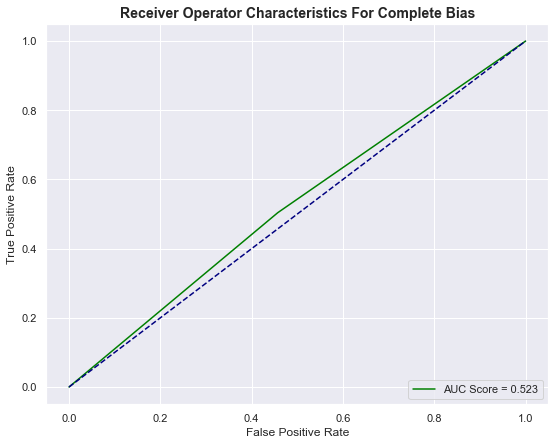

In [17]:
from sklearn.metrics import roc_curve, auc

# The the FPR and TPR from the roc_curve function:
(fpr, tpr, thresholds) = roc_curve(y_pred, y_test)

# Compute the AUC (Area-Under-The-Curve) Score:
auc_score = auc(fpr, tpr)

# Plotting the AUC-ROC curve:
fig, ax = plt.subplots(figsize=(9,7))
plt.title("Receiver Operator Characteristics For Complete Bias", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.plot(fpr, tpr, color='green', label="AUC Score = {}".format(round(auc_score, 3)))
ax.plot([0,1], [0,1], color='navy', linestyle='--')
plt.legend(loc='lower right')
plt.show()

<h3>After Feature Selection</h3>

In [20]:
# New training and label set:
X_new = final_df[['b']]
y_new = final_df['label']

Train on 1552 samples, validate on 388 samples
Epoch 1/500
1552/1552 [==============================] - 1s 826us/step - loss: 0.6947 - acc: 0.4929 - val_loss: 0.6931 - val_acc: 0.5232
Epoch 2/500
1552/1552 [==============================] - 0s 91us/step - loss: 0.6935 - acc: 0.5006 - val_loss: 0.6934 - val_acc: 0.5180
Epoch 3/500
1552/1552 [==============================] - 0s 82us/step - loss: 0.6929 - acc: 0.5129 - val_loss: 0.6941 - val_acc: 0.5361
Epoch 4/500
1552/1552 [==============================] - 0s 80us/step - loss: 0.6932 - acc: 0.5058 - val_loss: 0.6942 - val_acc: 0.5284
Epoch 5/500
1552/1552 [==============================] - 0s 73us/step - loss: 0.6929 - acc: 0.5039 - val_loss: 0.6937 - val_acc: 0.5180
Epoch 6/500
1552/1552 [==============================] - 0s 73us/step - loss: 0.6925 - acc: 0.5129 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 7/500
1552/1552 [==============================] - 0s 75us/step - loss: 0.6923 - acc: 0.5116 - val_loss: 0.6942 - val_acc: 0.4845


1552/1552 [==============================] - 0s 71us/step - loss: 0.6914 - acc: 0.5174 - val_loss: 0.6954 - val_acc: 0.4871
Epoch 61/500
1552/1552 [==============================] - 0s 76us/step - loss: 0.6915 - acc: 0.5219 - val_loss: 0.6957 - val_acc: 0.4923
Epoch 62/500
1552/1552 [==============================] - 0s 74us/step - loss: 0.6913 - acc: 0.5122 - val_loss: 0.6955 - val_acc: 0.4845
Epoch 63/500
1552/1552 [==============================] - 0s 75us/step - loss: 0.6914 - acc: 0.5213 - val_loss: 0.6952 - val_acc: 0.4923
Epoch 64/500
1552/1552 [==============================] - 0s 74us/step - loss: 0.6915 - acc: 0.5135 - val_loss: 0.6958 - val_acc: 0.4845
Epoch 65/500
1552/1552 [==============================] - 0s 73us/step - loss: 0.6914 - acc: 0.5245 - val_loss: 0.6955 - val_acc: 0.4871
Epoch 66/500
1552/1552 [==============================] - 0s 82us/step - loss: 0.6914 - acc: 0.5174 - val_loss: 0.6957 - val_acc: 0.4820
Epoch 67/500
1552/1552 [==============================

Epoch 120/500
1552/1552 [==============================] - 0s 81us/step - loss: 0.6911 - acc: 0.5238 - val_loss: 0.6959 - val_acc: 0.4897
Epoch 121/500
1552/1552 [==============================] - 0s 78us/step - loss: 0.6906 - acc: 0.5251 - val_loss: 0.6966 - val_acc: 0.4923
Epoch 122/500
1552/1552 [==============================] - 0s 78us/step - loss: 0.6908 - acc: 0.5264 - val_loss: 0.6963 - val_acc: 0.4923
Epoch 123/500
1552/1552 [==============================] - 0s 77us/step - loss: 0.6906 - acc: 0.5258 - val_loss: 0.6961 - val_acc: 0.4897
Epoch 124/500
1552/1552 [==============================] - 0s 73us/step - loss: 0.6911 - acc: 0.5180 - val_loss: 0.6959 - val_acc: 0.4948
Epoch 125/500
1552/1552 [==============================] - 0s 77us/step - loss: 0.6907 - acc: 0.5219 - val_loss: 0.6964 - val_acc: 0.4820
Epoch 126/500
1552/1552 [==============================] - 0s 78us/step - loss: 0.6907 - acc: 0.5245 - val_loss: 0.6965 - val_acc: 0.4871
Epoch 127/500
1552/1552 [=========

1552/1552 [==============================] - 0s 80us/step - loss: 0.6901 - acc: 0.5393 - val_loss: 0.6962 - val_acc: 0.4871
Epoch 180/500
1552/1552 [==============================] - 0s 84us/step - loss: 0.6904 - acc: 0.5264 - val_loss: 0.6967 - val_acc: 0.5026
Epoch 181/500
1552/1552 [==============================] - 0s 74us/step - loss: 0.6903 - acc: 0.5335 - val_loss: 0.6966 - val_acc: 0.4948
Epoch 182/500
1552/1552 [==============================] - 0s 77us/step - loss: 0.6905 - acc: 0.5354 - val_loss: 0.6970 - val_acc: 0.4897
Epoch 183/500
1552/1552 [==============================] - 0s 72us/step - loss: 0.6903 - acc: 0.5341 - val_loss: 0.6971 - val_acc: 0.5026
Epoch 184/500
1552/1552 [==============================] - 0s 73us/step - loss: 0.6905 - acc: 0.5341 - val_loss: 0.6965 - val_acc: 0.5000
Epoch 185/500
1552/1552 [==============================] - 0s 72us/step - loss: 0.6904 - acc: 0.5303 - val_loss: 0.6966 - val_acc: 0.4948
Epoch 186/500
1552/1552 [=======================

1552/1552 [==============================] - 0s 72us/step - loss: 0.6898 - acc: 0.5348 - val_loss: 0.6972 - val_acc: 0.4845
Epoch 239/500
1552/1552 [==============================] - 0s 70us/step - loss: 0.6900 - acc: 0.5354 - val_loss: 0.6968 - val_acc: 0.4845
Epoch 240/500
1552/1552 [==============================] - 0s 73us/step - loss: 0.6899 - acc: 0.5425 - val_loss: 0.6966 - val_acc: 0.4923
Epoch 241/500
1552/1552 [==============================] - 0s 72us/step - loss: 0.6901 - acc: 0.5335 - val_loss: 0.6971 - val_acc: 0.4923
Epoch 242/500
1552/1552 [==============================] - 0s 79us/step - loss: 0.6901 - acc: 0.5335 - val_loss: 0.6967 - val_acc: 0.4923
Epoch 243/500
1552/1552 [==============================] - 0s 72us/step - loss: 0.6898 - acc: 0.5361 - val_loss: 0.6967 - val_acc: 0.4948
Epoch 244/500
1552/1552 [==============================] - 0s 84us/step - loss: 0.6900 - acc: 0.5367 - val_loss: 0.6966 - val_acc: 0.4948
Epoch 245/500
1552/1552 [=======================

1552/1552 [==============================] - 0s 76us/step - loss: 0.6895 - acc: 0.5374 - val_loss: 0.6967 - val_acc: 0.4948
Epoch 298/500
1552/1552 [==============================] - 0s 82us/step - loss: 0.6898 - acc: 0.5309 - val_loss: 0.6967 - val_acc: 0.4974
Epoch 299/500
1552/1552 [==============================] - 0s 82us/step - loss: 0.6896 - acc: 0.5348 - val_loss: 0.6971 - val_acc: 0.4897
Epoch 300/500
1552/1552 [==============================] - 0s 82us/step - loss: 0.6893 - acc: 0.5367 - val_loss: 0.6966 - val_acc: 0.4923
Epoch 301/500
1552/1552 [==============================] - 0s 75us/step - loss: 0.6896 - acc: 0.5393 - val_loss: 0.6969 - val_acc: 0.4923
Epoch 302/500
1552/1552 [==============================] - 0s 85us/step - loss: 0.6896 - acc: 0.5303 - val_loss: 0.6967 - val_acc: 0.4948
Epoch 303/500
1552/1552 [==============================] - 0s 69us/step - loss: 0.6896 - acc: 0.5387 - val_loss: 0.6967 - val_acc: 0.4871
Epoch 304/500
1552/1552 [=======================

1552/1552 [==============================] - 0s 72us/step - loss: 0.6892 - acc: 0.5348 - val_loss: 0.6970 - val_acc: 0.4871
Epoch 357/500
1552/1552 [==============================] - 0s 80us/step - loss: 0.6897 - acc: 0.5322 - val_loss: 0.6967 - val_acc: 0.4897
Epoch 358/500
1552/1552 [==============================] - 0s 78us/step - loss: 0.6896 - acc: 0.5361 - val_loss: 0.6966 - val_acc: 0.4897
Epoch 359/500
1552/1552 [==============================] - 0s 74us/step - loss: 0.6894 - acc: 0.5374 - val_loss: 0.6970 - val_acc: 0.4871
Epoch 360/500
1552/1552 [==============================] - 0s 72us/step - loss: 0.6892 - acc: 0.5367 - val_loss: 0.6966 - val_acc: 0.4897
Epoch 361/500
1552/1552 [==============================] - 0s 75us/step - loss: 0.6890 - acc: 0.5399 - val_loss: 0.6967 - val_acc: 0.4897
Epoch 362/500
1552/1552 [==============================] - 0s 70us/step - loss: 0.6893 - acc: 0.5329 - val_loss: 0.6973 - val_acc: 0.4845
Epoch 363/500
1552/1552 [=======================

1552/1552 [==============================] - 0s 77us/step - loss: 0.6888 - acc: 0.5316 - val_loss: 0.6970 - val_acc: 0.4897
Epoch 416/500
1552/1552 [==============================] - 0s 74us/step - loss: 0.6886 - acc: 0.5387 - val_loss: 0.6967 - val_acc: 0.4871
Epoch 417/500
1552/1552 [==============================] - 0s 73us/step - loss: 0.6889 - acc: 0.5361 - val_loss: 0.6972 - val_acc: 0.4768
Epoch 418/500
1552/1552 [==============================] - 0s 74us/step - loss: 0.6889 - acc: 0.5341 - val_loss: 0.6969 - val_acc: 0.4897
Epoch 419/500
1552/1552 [==============================] - 0s 75us/step - loss: 0.6886 - acc: 0.5361 - val_loss: 0.6975 - val_acc: 0.4897
Epoch 420/500
1552/1552 [==============================] - 0s 72us/step - loss: 0.6887 - acc: 0.5335 - val_loss: 0.6968 - val_acc: 0.4794
Epoch 421/500
1552/1552 [==============================] - 0s 66us/step - loss: 0.6886 - acc: 0.5419 - val_loss: 0.6971 - val_acc: 0.4820
Epoch 422/500
1552/1552 [=======================

1552/1552 [==============================] - 0s 73us/step - loss: 0.6880 - acc: 0.5393 - val_loss: 0.6979 - val_acc: 0.4794
Epoch 475/500
1552/1552 [==============================] - 0s 74us/step - loss: 0.6879 - acc: 0.5374 - val_loss: 0.6971 - val_acc: 0.4820
Epoch 476/500
1552/1552 [==============================] - 0s 64us/step - loss: 0.6883 - acc: 0.5425 - val_loss: 0.6979 - val_acc: 0.4820
Epoch 477/500
1552/1552 [==============================] - 0s 63us/step - loss: 0.6880 - acc: 0.5393 - val_loss: 0.6979 - val_acc: 0.4794
Epoch 478/500
1552/1552 [==============================] - 0s 65us/step - loss: 0.6878 - acc: 0.5354 - val_loss: 0.6975 - val_acc: 0.4845
Epoch 479/500
1552/1552 [==============================] - 0s 75us/step - loss: 0.6882 - acc: 0.5387 - val_loss: 0.6973 - val_acc: 0.4845
Epoch 480/500
1552/1552 [==============================] - 0s 72us/step - loss: 0.6881 - acc: 0.5399 - val_loss: 0.6973 - val_acc: 0.4794
Epoch 481/500
1552/1552 [=======================

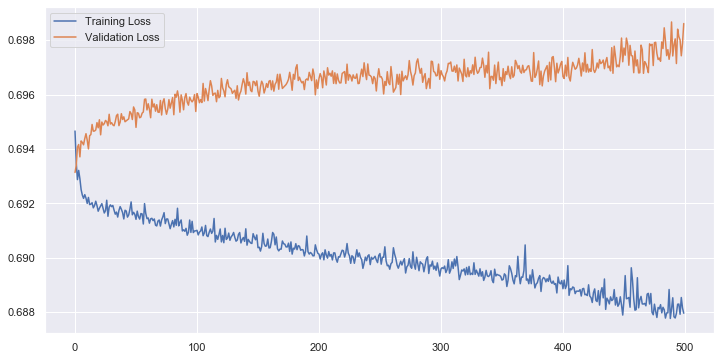

In [23]:
# Train-test splitting:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2)

# Normalise training set first and map mean and variance of standardised training set onto the test set.
std_scale = StandardScaler().fit(X_train_new)
X_train_new = std_scale.transform(X_train_new)
X_test_new = std_scale.transform(X_test_new)

# Importing libraries for machine learning via Keras:
from keras.models import Sequential
from keras.layers import Dense, Activation

model_nn2 = Sequential()
model_nn2.add(Dense(38, activation='relu', input_dim=1))
model_nn2.add(Dense(38, activation='relu'))
model_nn2.add(Dense(1, activation='sigmoid'))

model_nn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model_nn2.fit(X_train_new, y_train_new, validation_split=0.2, epochs=250)

# evaluate the model
_, train_acc = model_nn2.evaluate(X_train_new, y_train_new, verbose=0)
_, test_acc = model_nn2.evaluate(X_test_new, y_test_new, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
fig = plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

The final results after the feature selection show that parameters $a$ and $c$  allow the validation loss to approach a loss of 72.8% and stay within that loss as opposed to growing further like the case with using all features. The final accuracies achieved by the model were:

- Training: 58.7%
- Test: 52.9%

Where the accuracies of both the training and the test set are essentially the same which is much better than having the drastically higher training accuracy than the validation accuracy in the first case which suggests overfitting occurred.

In [24]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Perform a prediction using model_nn:
y_pred2 = model_nn2.predict_classes(X_test_new)

# Compute each metric:
acc2 = accuracy_score(y_pred2, y_test_new)
recall2 = recall_score(y_pred2, y_test_new)
precision2 = precision_score(y_pred2, y_test_new)
f1_score2 = f1_score(y_pred2, y_test_new)

# Print out the metrics:
print("Accuracy = {}".format(acc2))
print("Recall = {}".format(recall2))
print("Precision = {}".format(precision2))
print("F1 Score = {}".format(f1_score2))

Accuracy = 0.5041152263374485
Recall = 0.4867924528301887
Precision = 0.5512820512820513
F1 Score = 0.5170340681362726


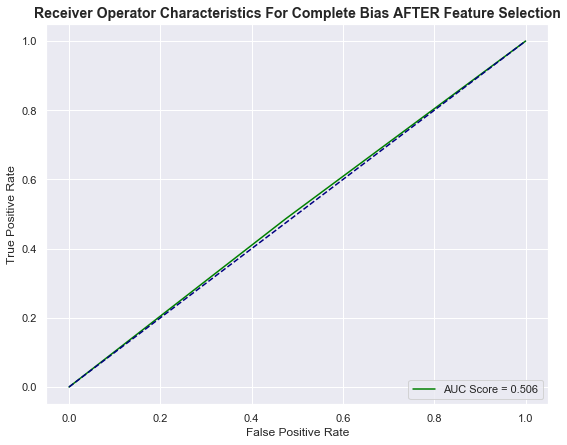

In [25]:
from sklearn.metrics import roc_curve, auc

# The the FPR and TPR from the roc_curve function:
(fpr2, tpr2, thresholds2) = roc_curve(y_pred2, y_test_new)

# Compute the AUC (Area-Under-The-Curve) Score:
auc_score2 = auc(fpr2, tpr2)

# Plotting the AUC-ROC curve:
fig, ax = plt.subplots(figsize=(9,7))
plt.title("Receiver Operator Characteristics For Complete Bias AFTER Feature Selection", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.plot(fpr2, tpr2, color='green', label="AUC Score = {}".format(round(auc_score2, 3)))
ax.plot([0,1], [0,1], color='navy', linestyle='--')
plt.legend(loc='lower right')
plt.show()

<h3>Introducing Dropout In Between Layers</h3>

Train on 1552 samples, validate on 388 samples
Epoch 1/250
1552/1552 [==============================] - 1s 780us/step - loss: 0.6937 - acc: 0.5013 - val_loss: 0.6964 - val_acc: 0.4871
Epoch 2/250
1552/1552 [==============================] - 0s 98us/step - loss: 0.6940 - acc: 0.5071 - val_loss: 0.6967 - val_acc: 0.4820
Epoch 3/250
1552/1552 [==============================] - 0s 92us/step - loss: 0.6934 - acc: 0.5148 - val_loss: 0.6964 - val_acc: 0.4820
Epoch 4/250
1552/1552 [==============================] - 0s 90us/step - loss: 0.6934 - acc: 0.5148 - val_loss: 0.6965 - val_acc: 0.4845
Epoch 5/250
1552/1552 [==============================] - 0s 92us/step - loss: 0.6934 - acc: 0.5077 - val_loss: 0.6951 - val_acc: 0.4691
Epoch 6/250
1552/1552 [==============================] - 0s 97us/step - loss: 0.6930 - acc: 0.5238 - val_loss: 0.6962 - val_acc: 0.4845
Epoch 7/250
1552/1552 [==============================] - 0s 98us/step - loss: 0.6940 - acc: 0.5155 - val_loss: 0.6961 - val_acc: 0.4871


1552/1552 [==============================] - 0s 81us/step - loss: 0.6911 - acc: 0.5148 - val_loss: 0.6958 - val_acc: 0.4923
Epoch 61/250
1552/1552 [==============================] - 0s 82us/step - loss: 0.6909 - acc: 0.5180 - val_loss: 0.6963 - val_acc: 0.4845
Epoch 62/250
1552/1552 [==============================] - 0s 83us/step - loss: 0.6921 - acc: 0.5142 - val_loss: 0.6963 - val_acc: 0.4897
Epoch 63/250
1552/1552 [==============================] - 0s 76us/step - loss: 0.6922 - acc: 0.5180 - val_loss: 0.6960 - val_acc: 0.4871
Epoch 64/250
1552/1552 [==============================] - 0s 73us/step - loss: 0.6918 - acc: 0.5116 - val_loss: 0.6958 - val_acc: 0.4845
Epoch 65/250
1552/1552 [==============================] - 0s 83us/step - loss: 0.6921 - acc: 0.5148 - val_loss: 0.6958 - val_acc: 0.4923
Epoch 66/250
1552/1552 [==============================] - 0s 81us/step - loss: 0.6913 - acc: 0.5161 - val_loss: 0.6958 - val_acc: 0.4871
Epoch 67/250
1552/1552 [==============================

Epoch 120/250
1552/1552 [==============================] - 0s 97us/step - loss: 0.6914 - acc: 0.5180 - val_loss: 0.6953 - val_acc: 0.4871
Epoch 121/250
1552/1552 [==============================] - 0s 95us/step - loss: 0.6917 - acc: 0.5168 - val_loss: 0.6954 - val_acc: 0.4871
Epoch 122/250
1552/1552 [==============================] - 0s 94us/step - loss: 0.6916 - acc: 0.5168 - val_loss: 0.6956 - val_acc: 0.4871
Epoch 123/250
1552/1552 [==============================] - 0s 97us/step - loss: 0.6916 - acc: 0.5193 - val_loss: 0.6959 - val_acc: 0.4871
Epoch 124/250
1552/1552 [==============================] - 0s 97us/step - loss: 0.6917 - acc: 0.5155 - val_loss: 0.6957 - val_acc: 0.4845
Epoch 125/250
1552/1552 [==============================] - 0s 92us/step - loss: 0.6916 - acc: 0.5155 - val_loss: 0.6957 - val_acc: 0.4871
Epoch 126/250
1552/1552 [==============================] - 0s 99us/step - loss: 0.6917 - acc: 0.5161 - val_loss: 0.6959 - val_acc: 0.4871
Epoch 127/250
1552/1552 [=========

1552/1552 [==============================] - 0s 96us/step - loss: 0.6908 - acc: 0.5168 - val_loss: 0.6962 - val_acc: 0.4871
Epoch 180/250
1552/1552 [==============================] - 0s 89us/step - loss: 0.6917 - acc: 0.5161 - val_loss: 0.6961 - val_acc: 0.4871
Epoch 181/250
1552/1552 [==============================] - 0s 79us/step - loss: 0.6922 - acc: 0.5168 - val_loss: 0.6959 - val_acc: 0.4897
Epoch 182/250
1552/1552 [==============================] - 0s 89us/step - loss: 0.6912 - acc: 0.5155 - val_loss: 0.6962 - val_acc: 0.4871
Epoch 183/250
1552/1552 [==============================] - 0s 79us/step - loss: 0.6913 - acc: 0.5168 - val_loss: 0.6959 - val_acc: 0.4871
Epoch 184/250
1552/1552 [==============================] - 0s 79us/step - loss: 0.6906 - acc: 0.5174 - val_loss: 0.6961 - val_acc: 0.4871
Epoch 185/250
1552/1552 [==============================] - 0s 85us/step - loss: 0.6907 - acc: 0.5161 - val_loss: 0.6963 - val_acc: 0.4871
Epoch 186/250
1552/1552 [=======================

1552/1552 [==============================] - 0s 86us/step - loss: 0.6919 - acc: 0.5148 - val_loss: 0.6959 - val_acc: 0.4871
Epoch 239/250
1552/1552 [==============================] - 0s 85us/step - loss: 0.6914 - acc: 0.5161 - val_loss: 0.6960 - val_acc: 0.4845
Epoch 240/250
1552/1552 [==============================] - 0s 89us/step - loss: 0.6912 - acc: 0.5142 - val_loss: 0.6959 - val_acc: 0.4871
Epoch 241/250
1552/1552 [==============================] - 0s 90us/step - loss: 0.6909 - acc: 0.5155 - val_loss: 0.6963 - val_acc: 0.4871
Epoch 242/250
1552/1552 [==============================] - 0s 87us/step - loss: 0.6922 - acc: 0.5148 - val_loss: 0.6960 - val_acc: 0.4897
Epoch 243/250
1552/1552 [==============================] - 0s 89us/step - loss: 0.6915 - acc: 0.5161 - val_loss: 0.6960 - val_acc: 0.4845
Epoch 244/250
1552/1552 [==============================] - 0s 87us/step - loss: 0.6915 - acc: 0.5161 - val_loss: 0.6960 - val_acc: 0.4871
Epoch 245/250
1552/1552 [=======================

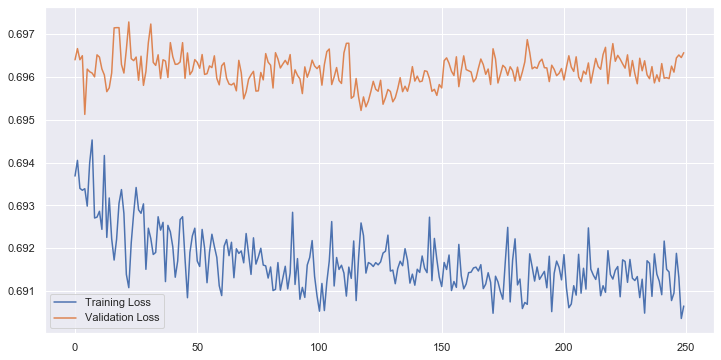

In [31]:
# Train-test splitting:
X_train_new2, X_test_new2, y_train_new2, y_test_new2 = train_test_split(X_new, y_new, test_size=0.2)

# Normalise training set first and map mean and variance of standardised training set onto the test set.
std_scale = StandardScaler().fit(X_train_new2)
X_train_new2 = std_scale.transform(X_train_new2)
X_test_new2 = std_scale.transform(X_test_new2)

# Importing libraries for machine learning via Keras:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout

model_nn3 = Sequential()
model_nn3.add(Dense(38, activation='relu', input_dim=1))
model_nn3.add(Dropout(0.2))
model_nn3.add(Dense(38, activation='relu'))
model_nn3.add(Dropout(0.2))
model_nn3.add(Dense(1, activation='sigmoid'))

model_nn3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model_nn3.fit(X_train_new2, y_train_new2, validation_split=0.2, epochs=250)

# evaluate the model
_, train_acc = model_nn3.evaluate(X_train_new2, y_train_new2, verbose=0)
_, test_acc = model_nn3.evaluate(X_test_new2, y_test_new2, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
fig = plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Perform a prediction using model_nn:
y_pred3 = model_nn3.predict_classes(X_test_new2)

# Compute each metric:
acc3 = accuracy_score(y_pred3, y_test_new2)
recall3 = recall_score(y_pred3, y_test_new2)
precision3 = precision_score(y_pred3, y_test_new2)
f1_score3 = f1_score(y_pred3, y_test_new2)

# Print out the metrics:
print("Accuracy = {}".format(acc3))
print("Recall = {}".format(recall3))
print("Precision = {}".format(precision3))
print("F1 Score = {}".format(f1_score3))

Accuracy = 0.46502057613168724
Recall = 0.6666666666666666
Precision = 0.022813688212927757
F1 Score = 0.04411764705882353


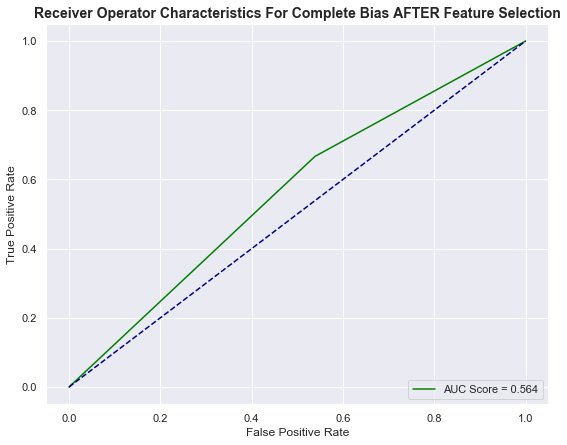

In [33]:
from sklearn.metrics import roc_curve, auc

# The the FPR and TPR from the roc_curve function:
(fpr3, tpr3, thresholds3) = roc_curve(y_pred3, y_test_new2)

# Compute the AUC (Area-Under-The-Curve) Score:
auc_score3 = auc(fpr3, tpr3)

# Plotting the AUC-ROC curve:
fig, ax = plt.subplots(figsize=(9,7))
plt.title("Receiver Operator Characteristics For Complete Bias AFTER Feature Selection", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.plot(fpr3, tpr3, color='green', label="AUC Score = {}".format(round(auc_score3, 3)))
ax.plot([0,1], [0,1], color='navy', linestyle='--')
plt.legend(loc='lower right')
plt.show()

The introduction of a 30% dropout probability means that 30% of the time, neurons in the hidden layer are deactivated or ignored during the training process. This means their contribution to the neurons in the subsequent layers are not applied and neither do they contribute to neurons during the back propagation stage. This minimises the chances of the neural network overfitting to the data and allows the model to generalise.

For this particular scenario, we can see the training and test accuracies have maintained their levels:

- Training Accuracy = 56.1%
- Testing Accuracy = 49.6%

However, the validation loss for both the training and test data has improved compared to the last iteration where dropout was not included. The training and validation loss are:

- Training Loss = 67.80%
- Validation Loss = 71.02%

The validation loss has seen an approximate 2% improvement as a result of the dropout regularisation being introduced into the model.

<h2>Comments</h2>

